<a href="https://colab.research.google.com/github/fayaz-rafin/yuHacks-discord-bot-workshop-/blob/main/Discord_Bot_workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSHub presents: Discord bot 101
Guide written by Fayaz Rafin.

# Welcome to our workshop! 
In this tutorial, you'll be learning how to make a discord bot from scratch and add cool features. 

 The Objective of this workshop is to build a semi-functional Poke

In [ ]:
print("Lets begin!")

Lets begin!


## Step 1: Installing Dependencies
---

1. We need to install the discord.py library for our code. If you're on a local machine, then go to your terminal (**linux** and **macOS**) of your prefered IDE and type the following line `python3 -m pip install -U discord.py` and if you're on **Windows**, then type `py -3 -m pip install -U discord.py`.
2. We need to import commands from discord.py. For that, we type `from discord.ext import commands`.
3. We need to `import requests`.
4. We need to `import json`.

In [ ]:
import discord
from discord.ext import commands
import requests
import json

## Step 2: Creating a Discord Application and Linking it to Your Code

1. Head on your Discord settings and turn on Developer Mode
> Discord > User Settings > Advanced > Developer Mode



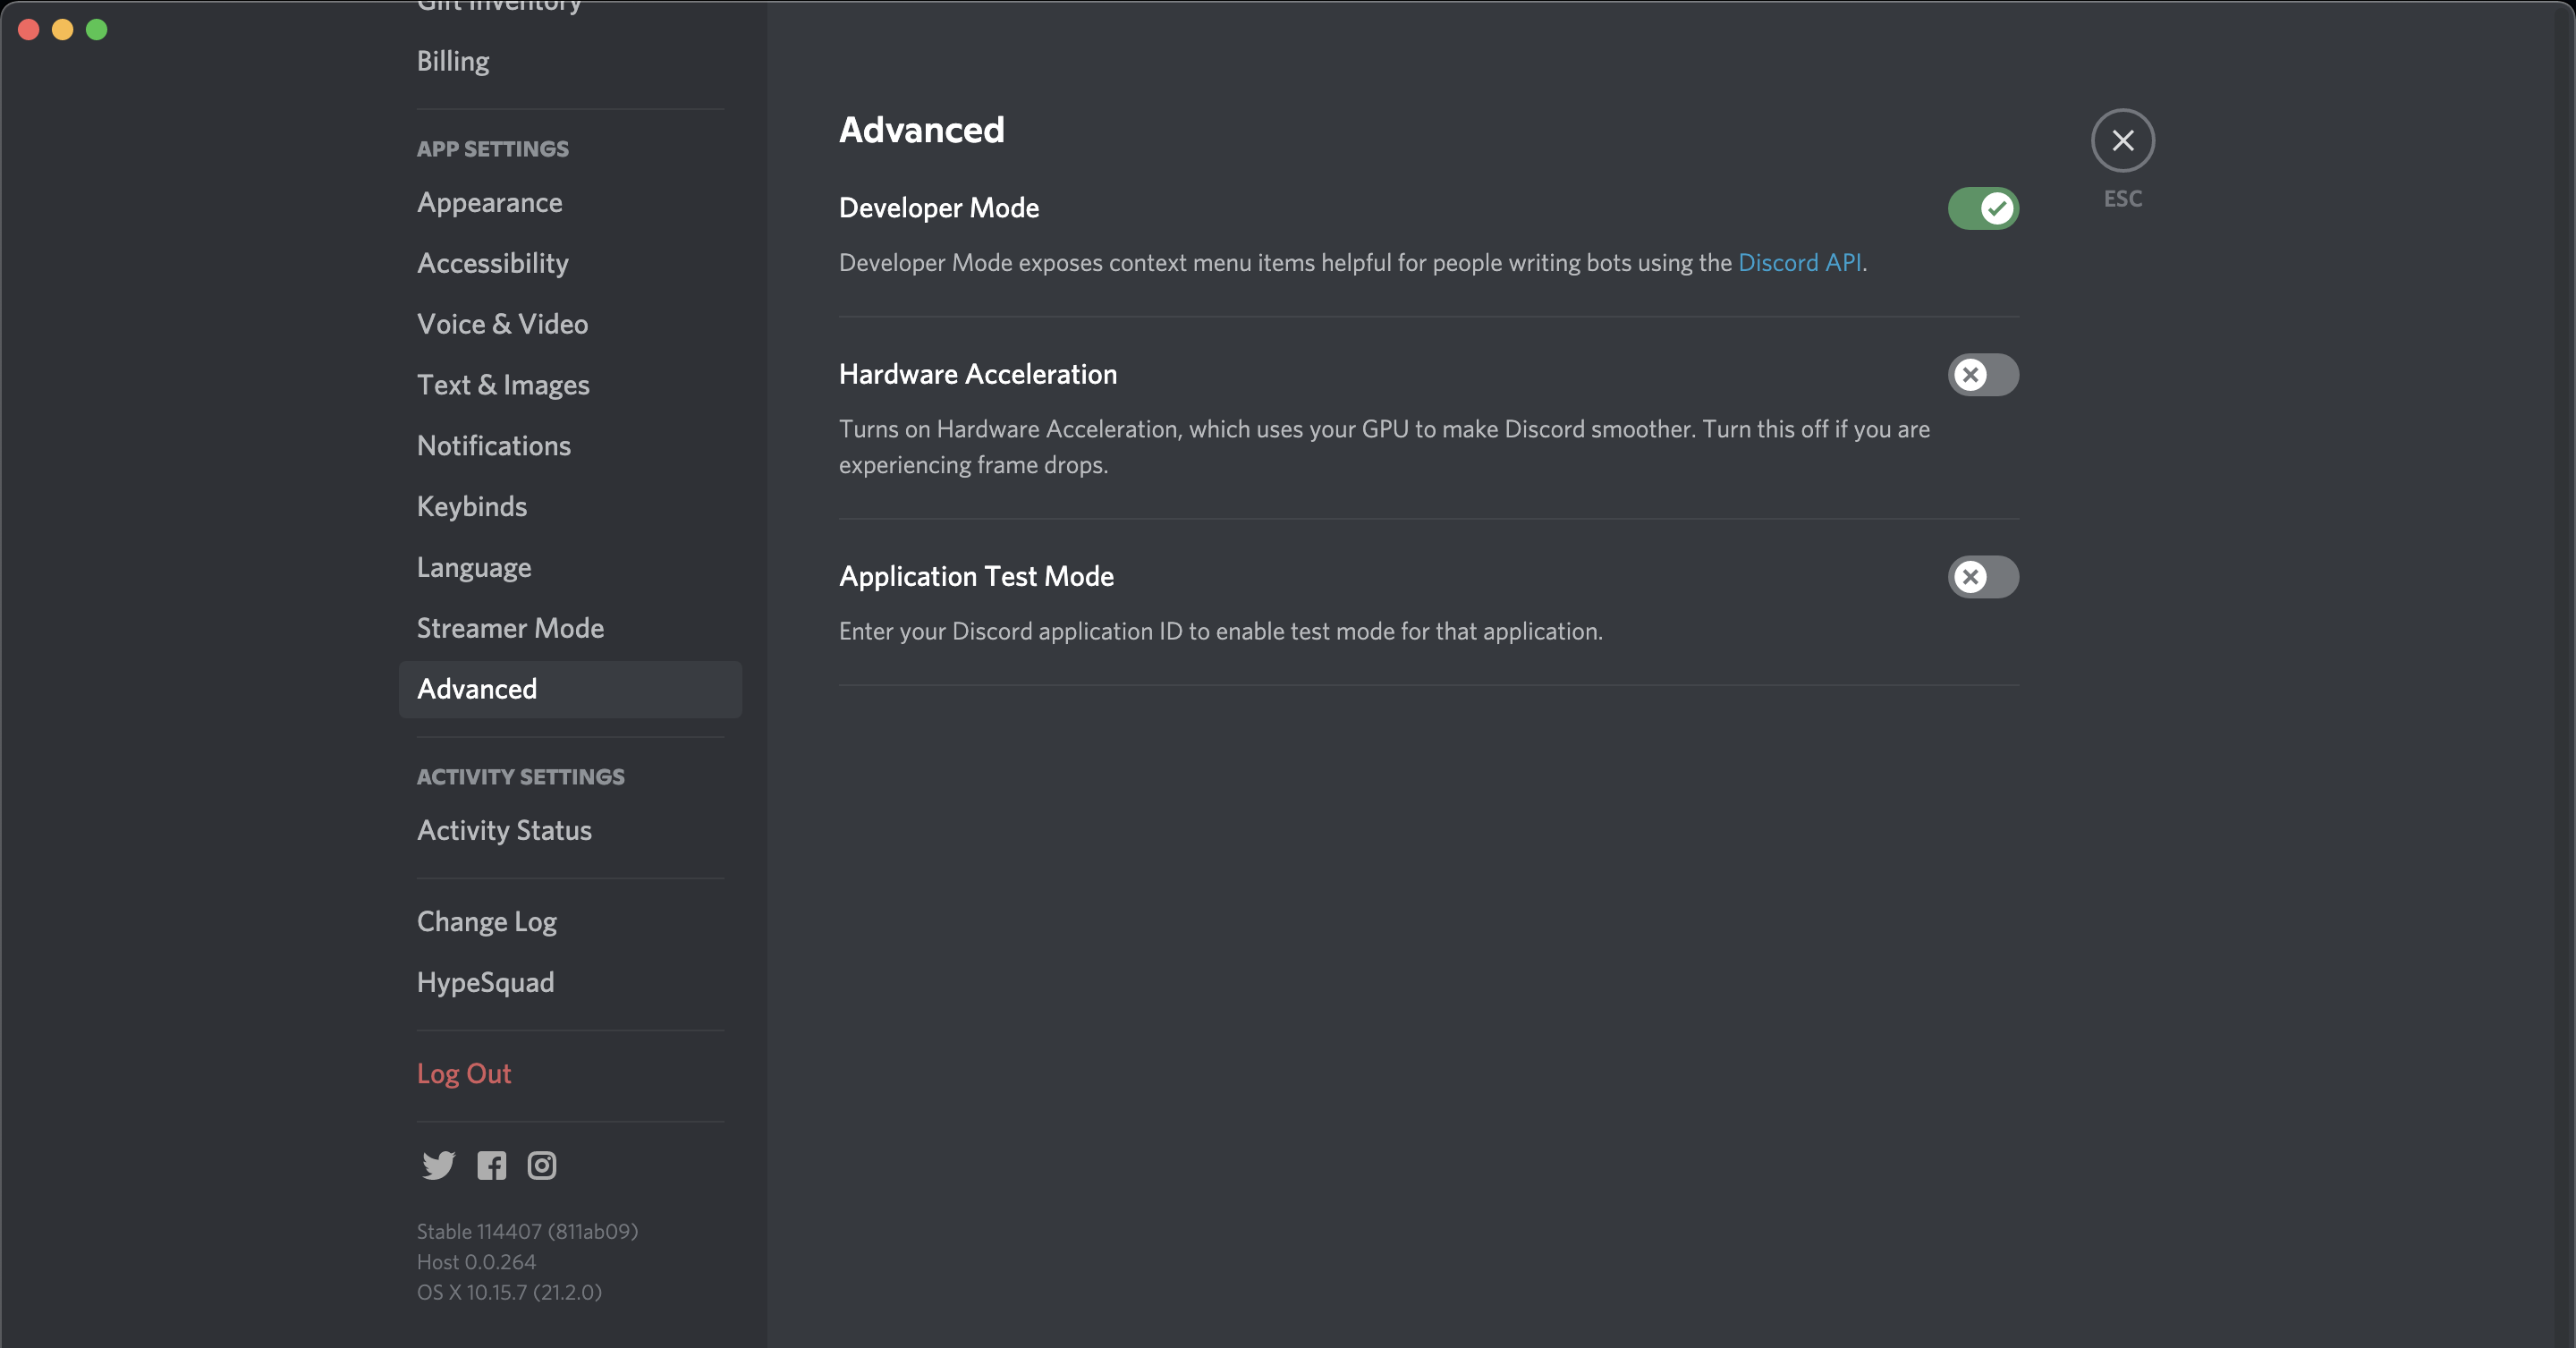

3. Create a new application on the [Discord Developer Portal](https://discord.com/developers/docs/intro)


> Applications > New Application > Name

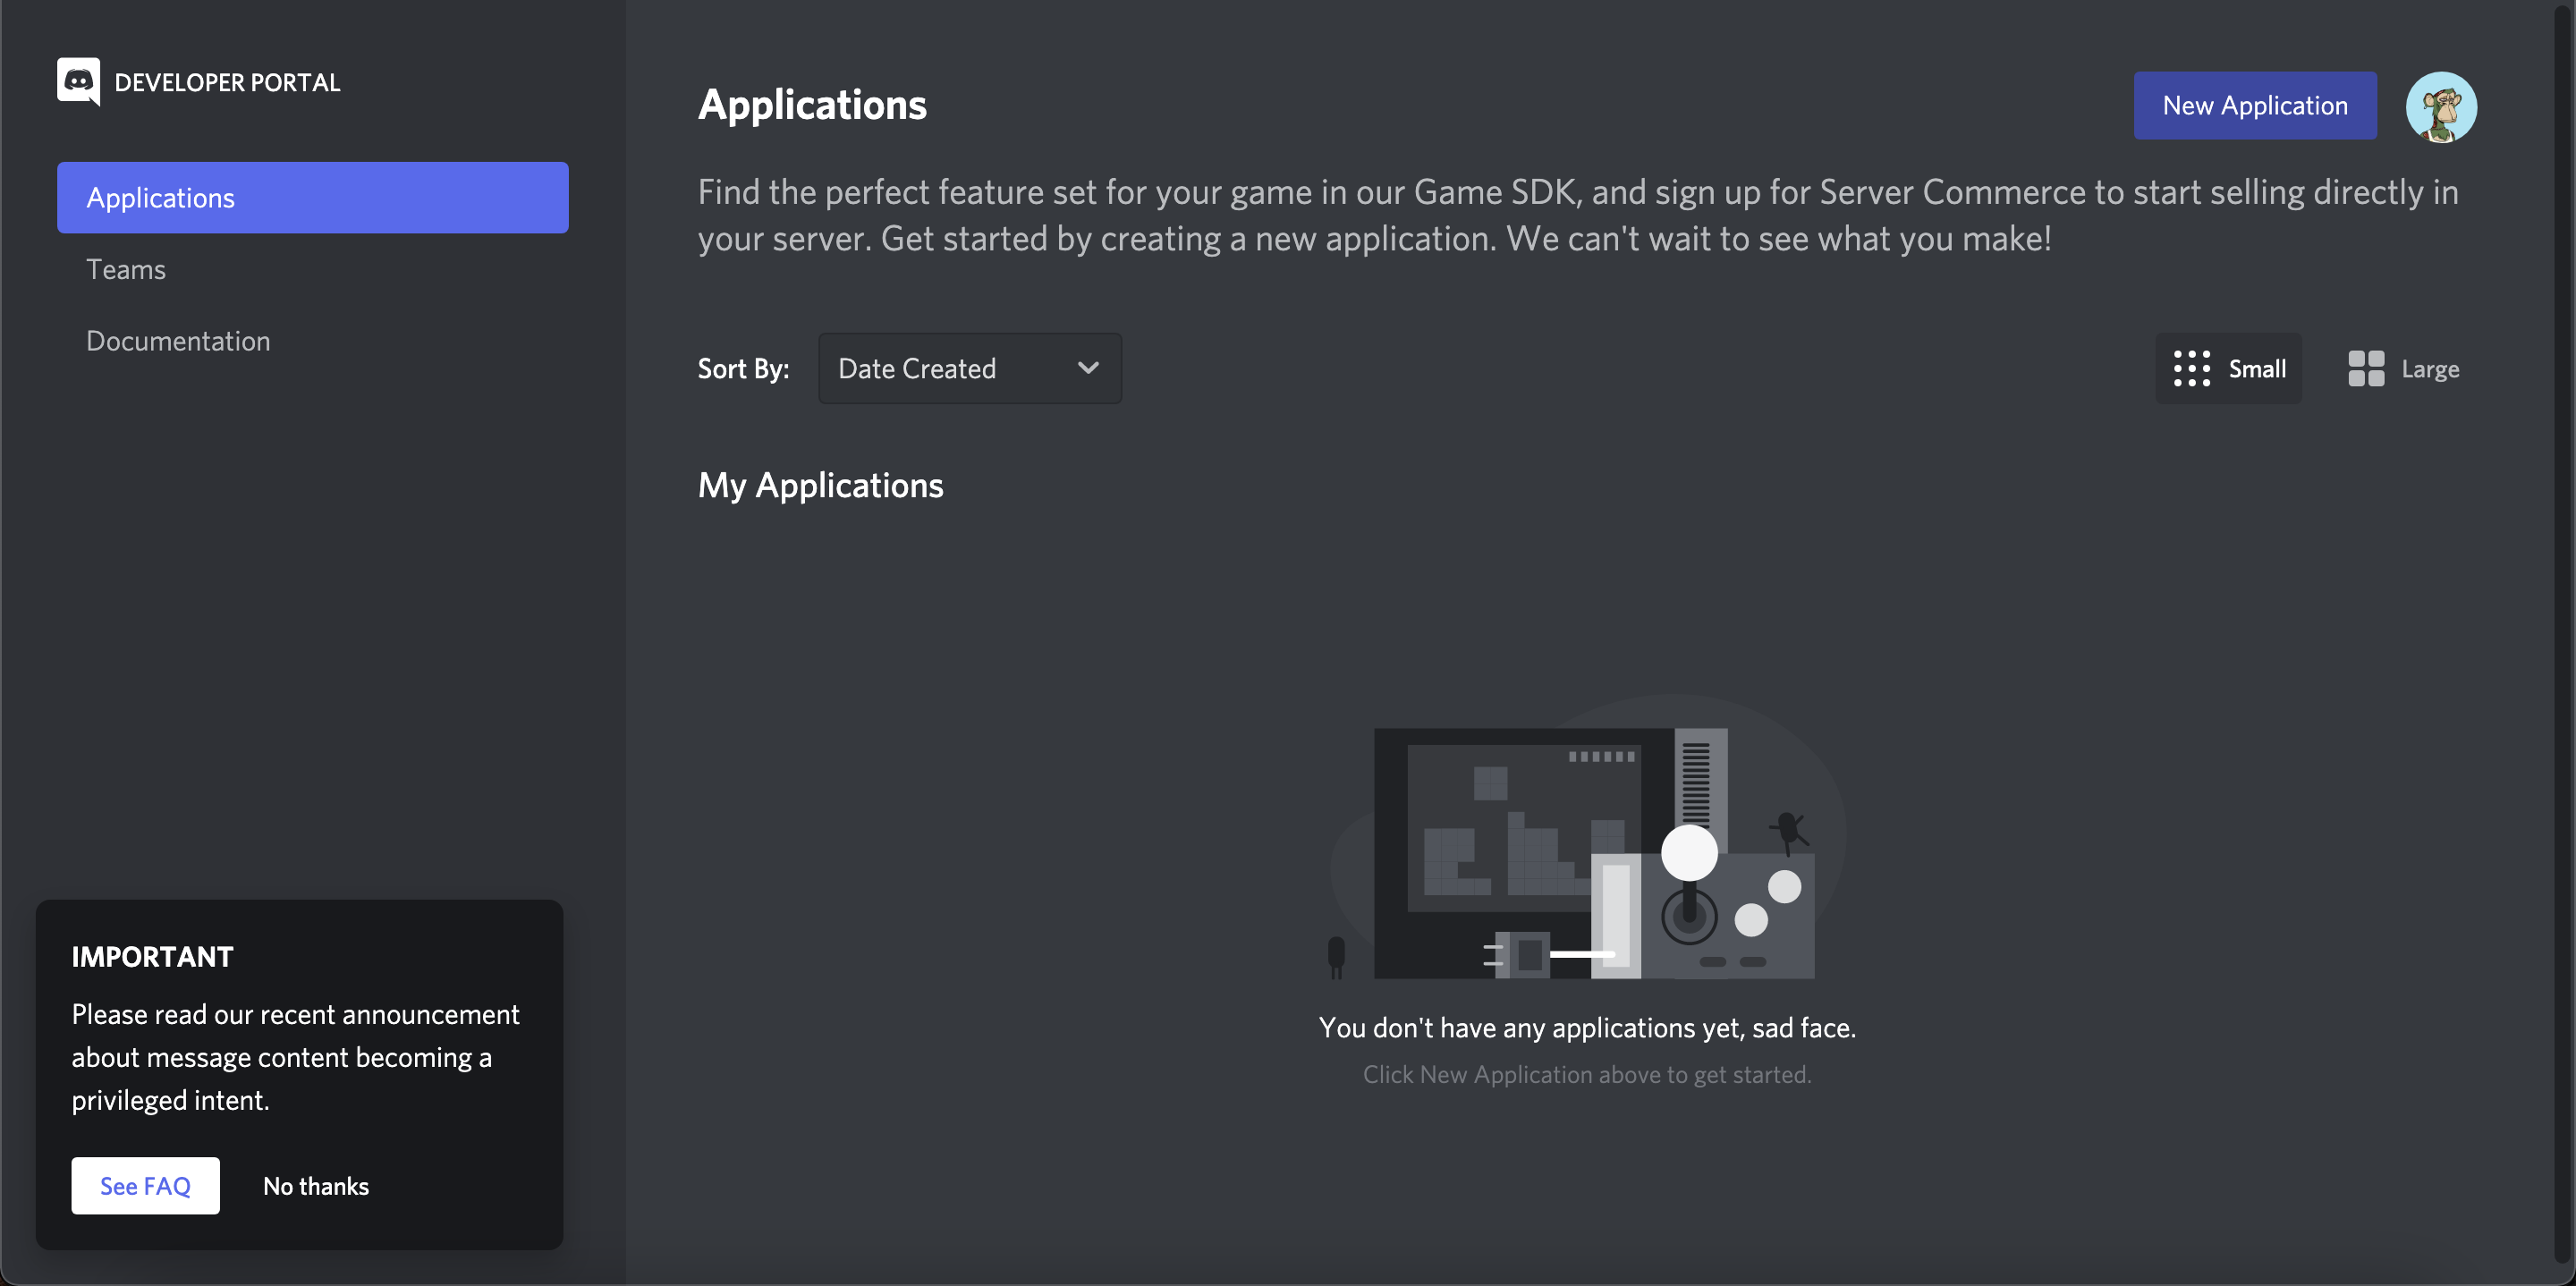

You can name your appliation anything you want. but for convenience’s sake, we're going to name this the same as our bot so we can keep track.

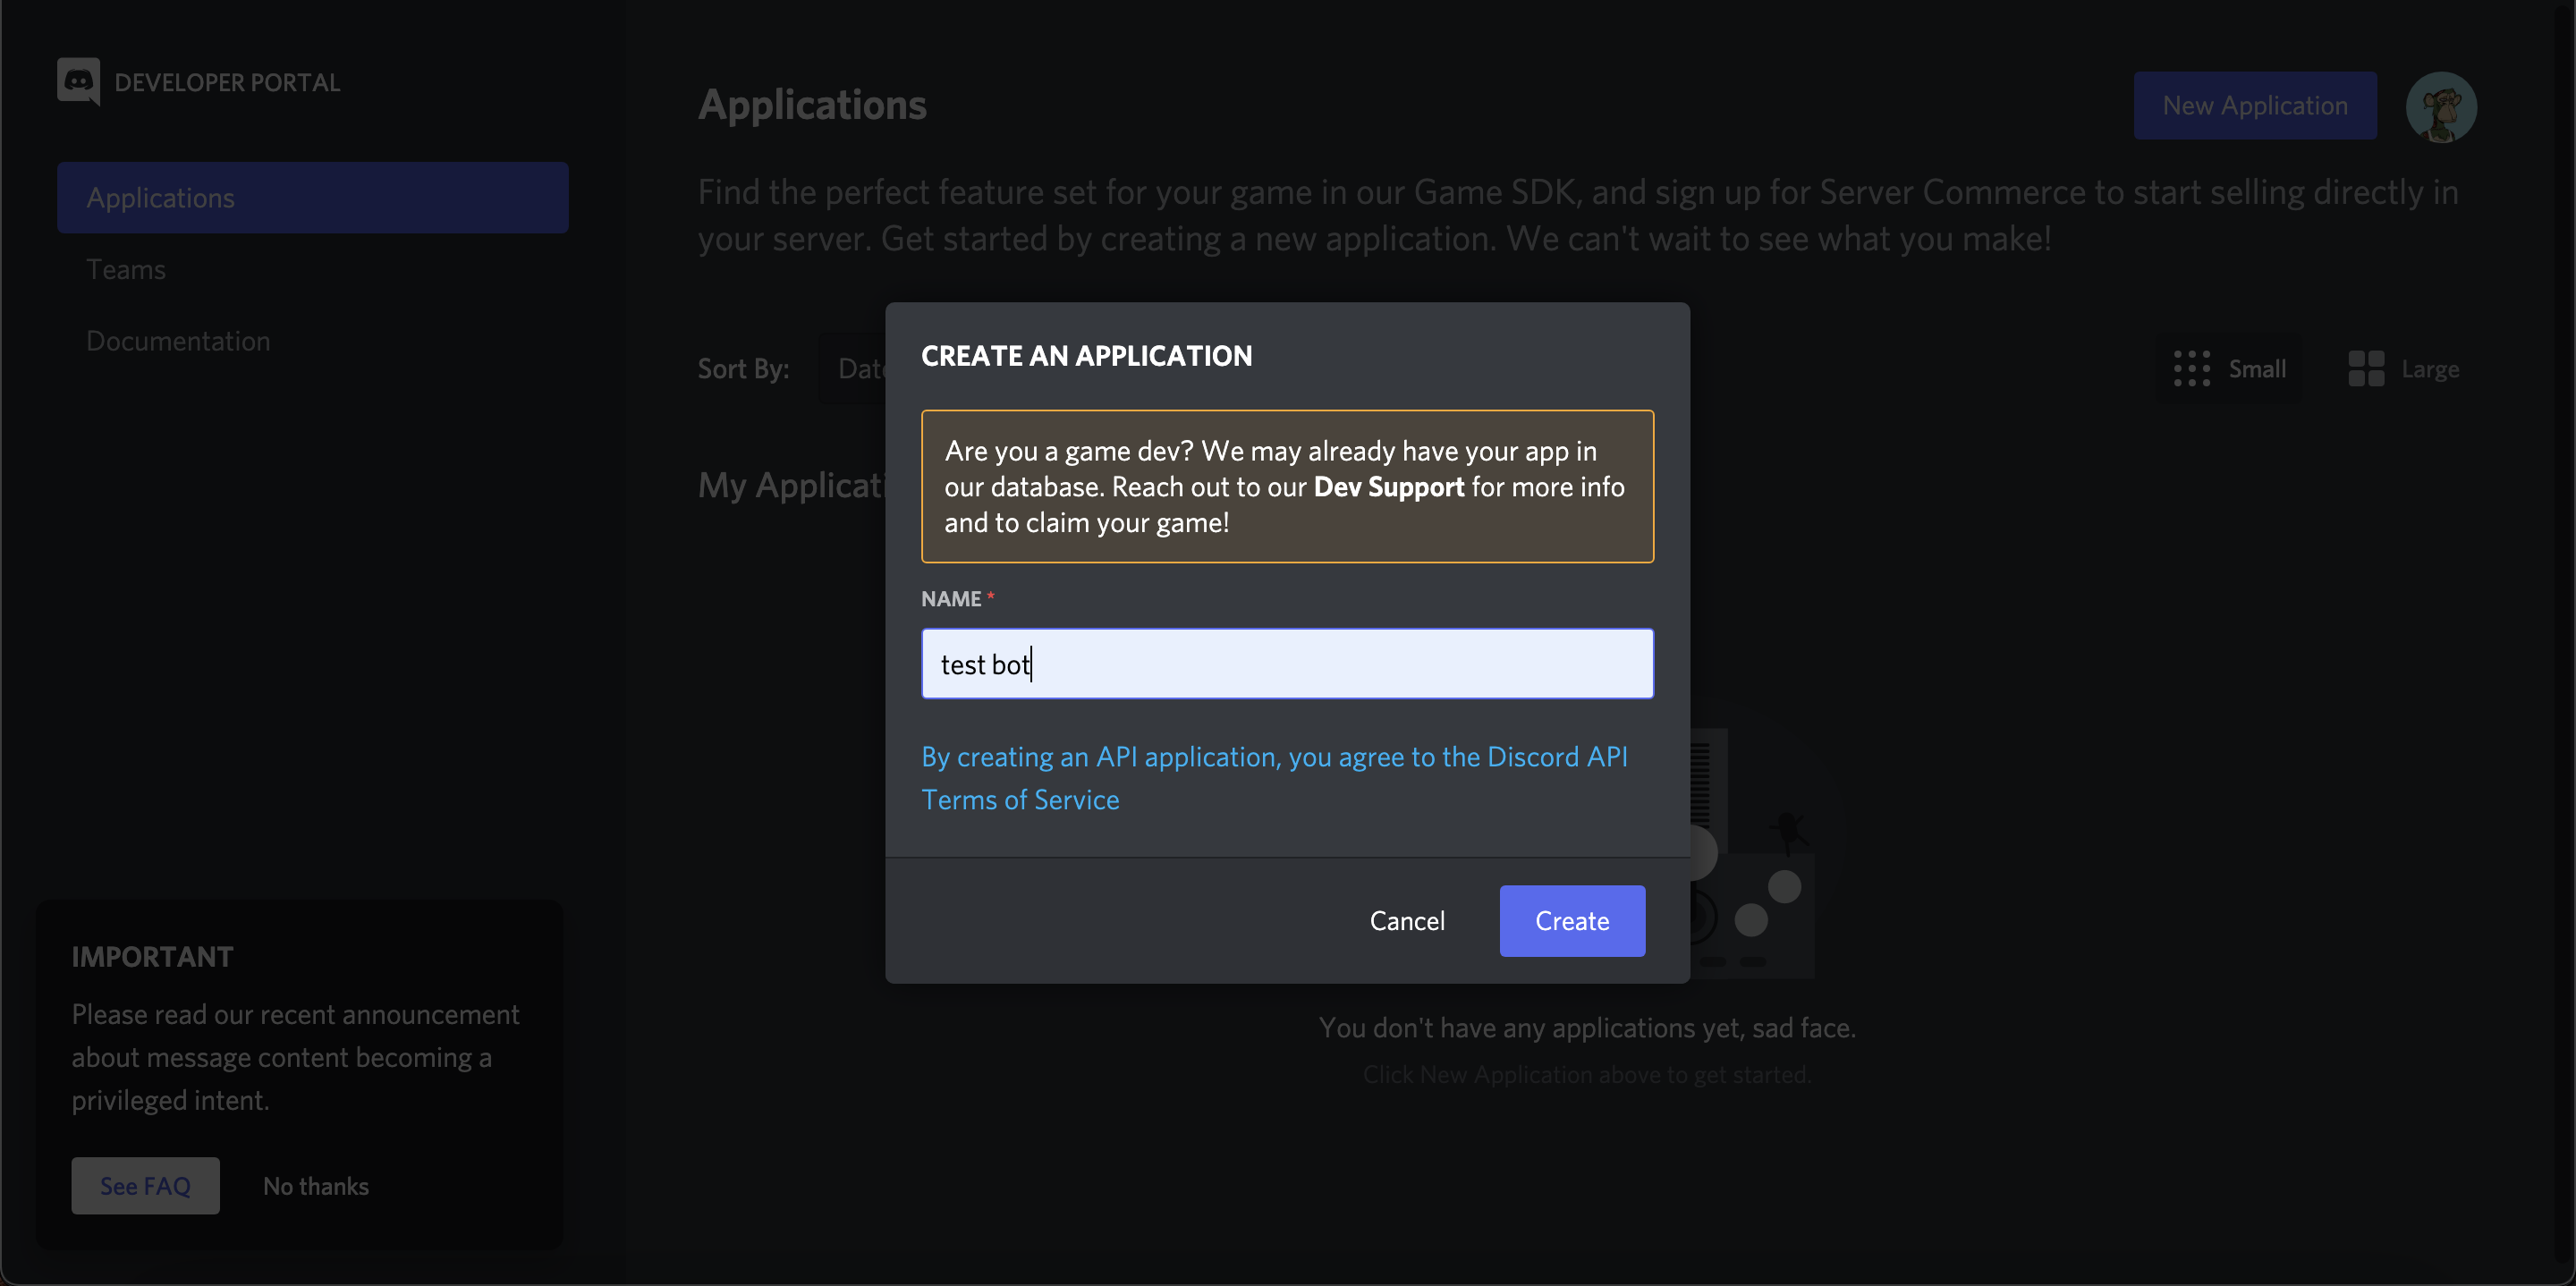

4. Add and configure a bot
> Bot > Add Bot > Bot Permissions

5. Create an invite link to add the bot to your server
> OAuth2 > URL Generator > Select Bot > Bot Permissions > Copy Link > Open Link in Browser > Add Bot to Server

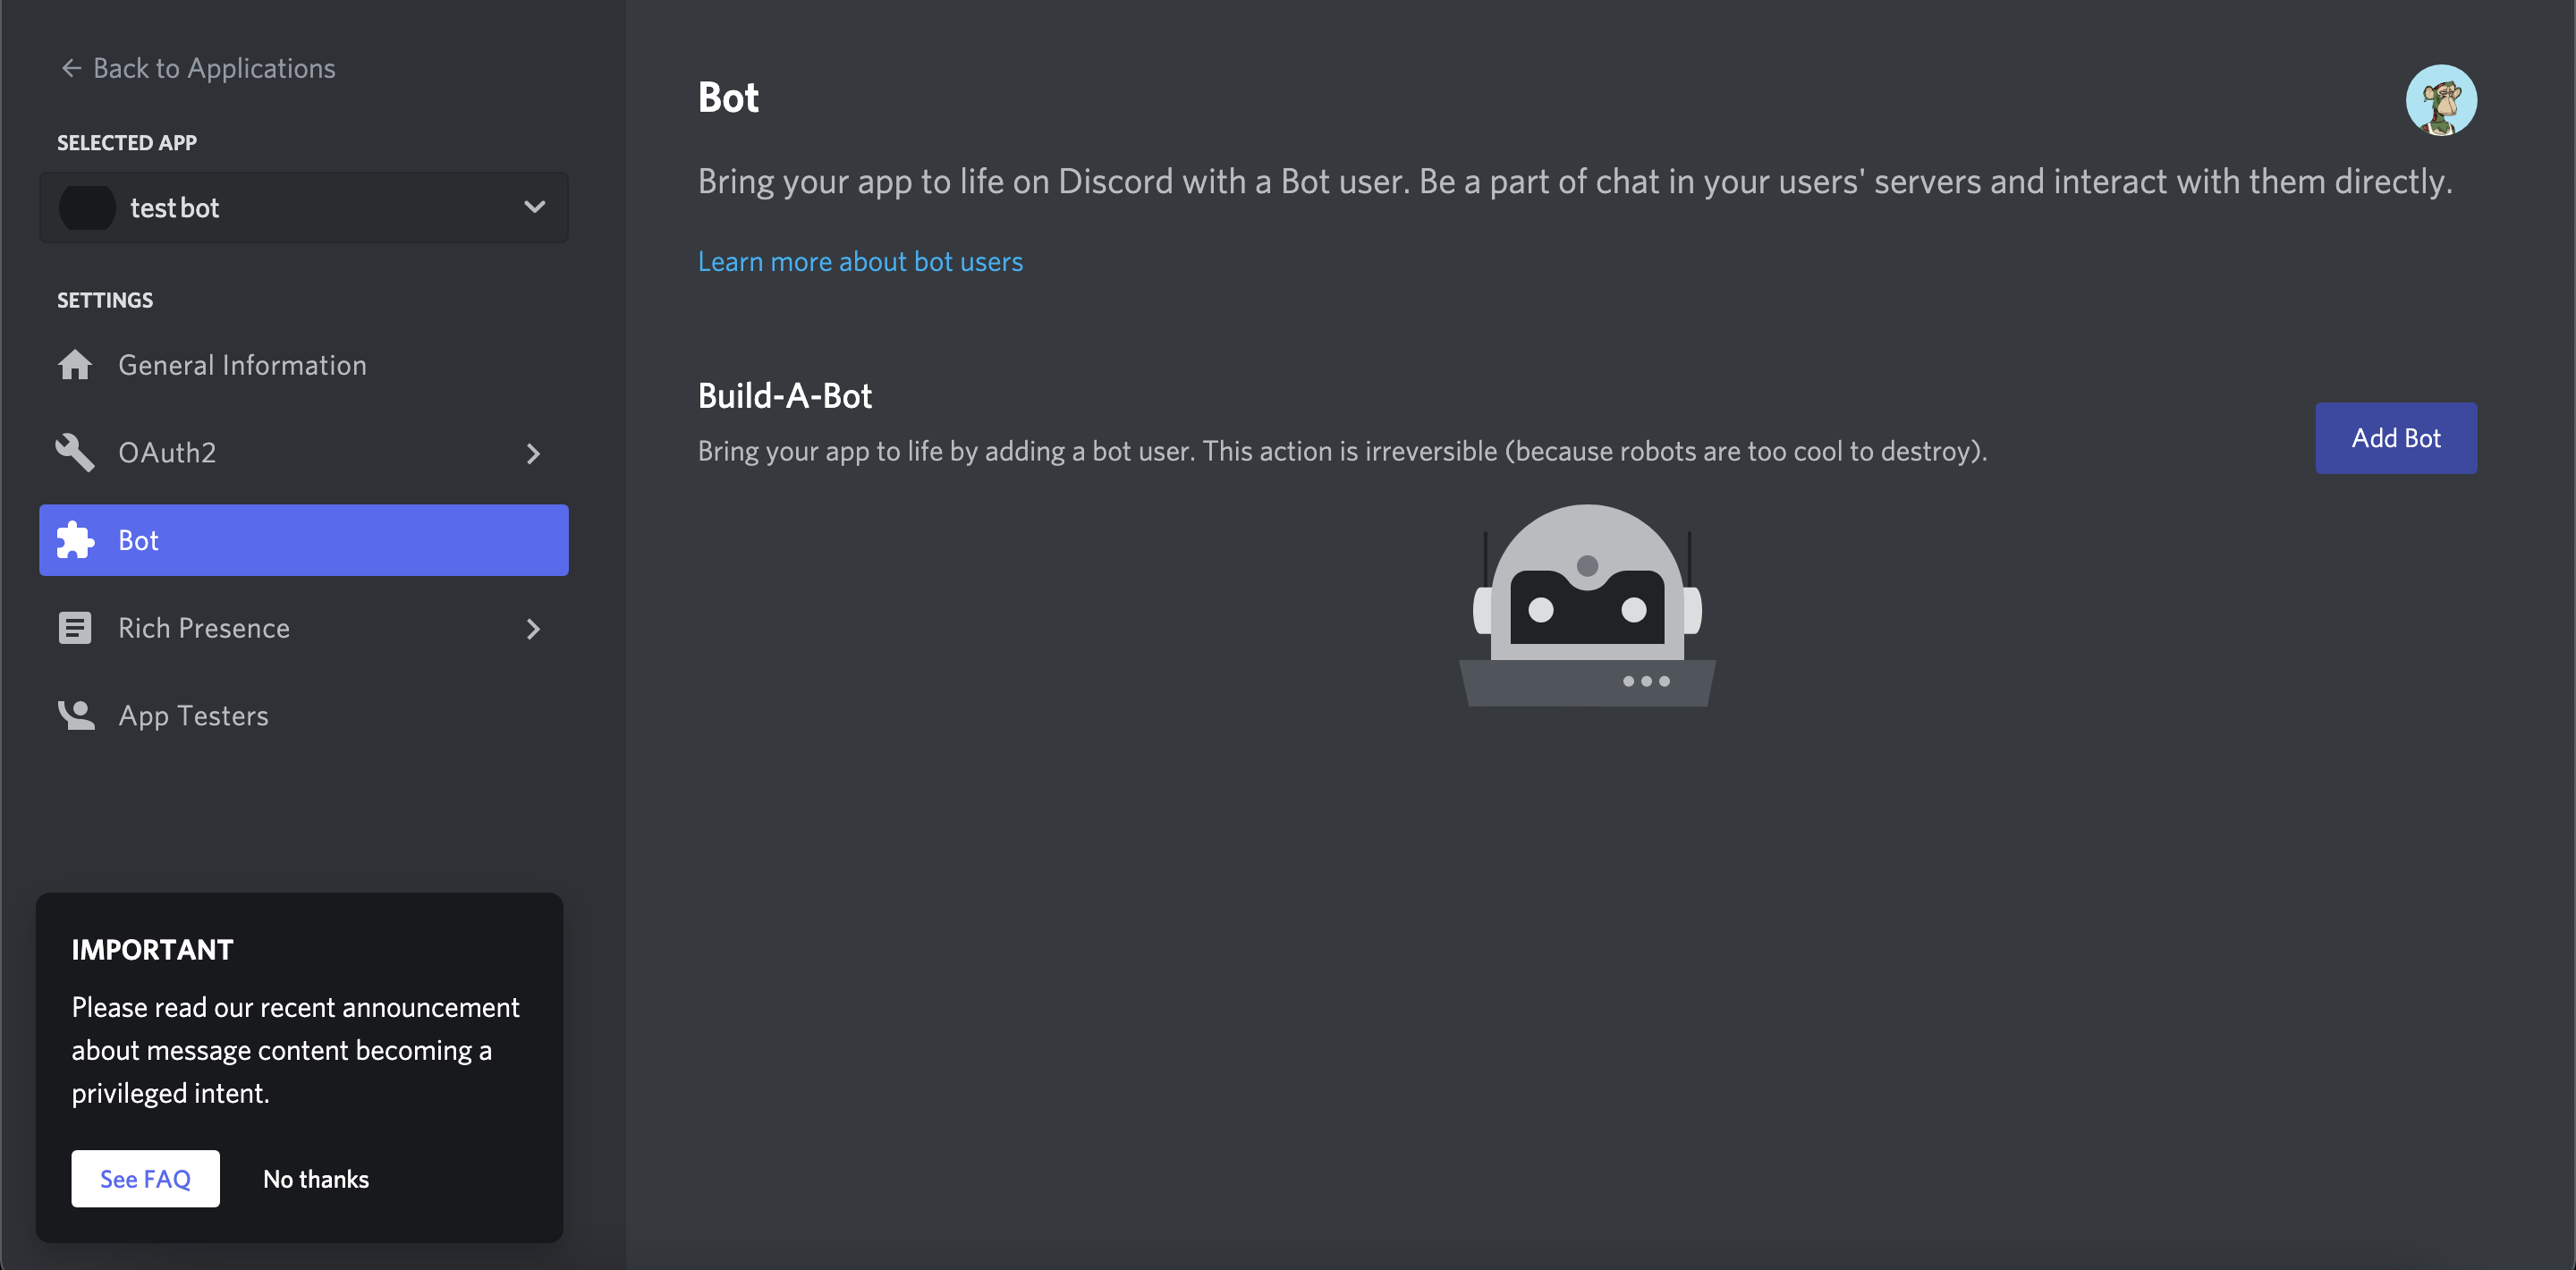

6. We now need to invite the bot in our server. To do that, we simply go to OAuth2, and then we generate a invite link for our bot. We will first specify it's a bot by check marking the bot from 'scopes'. This makes our Application identify our API is a discord bot.

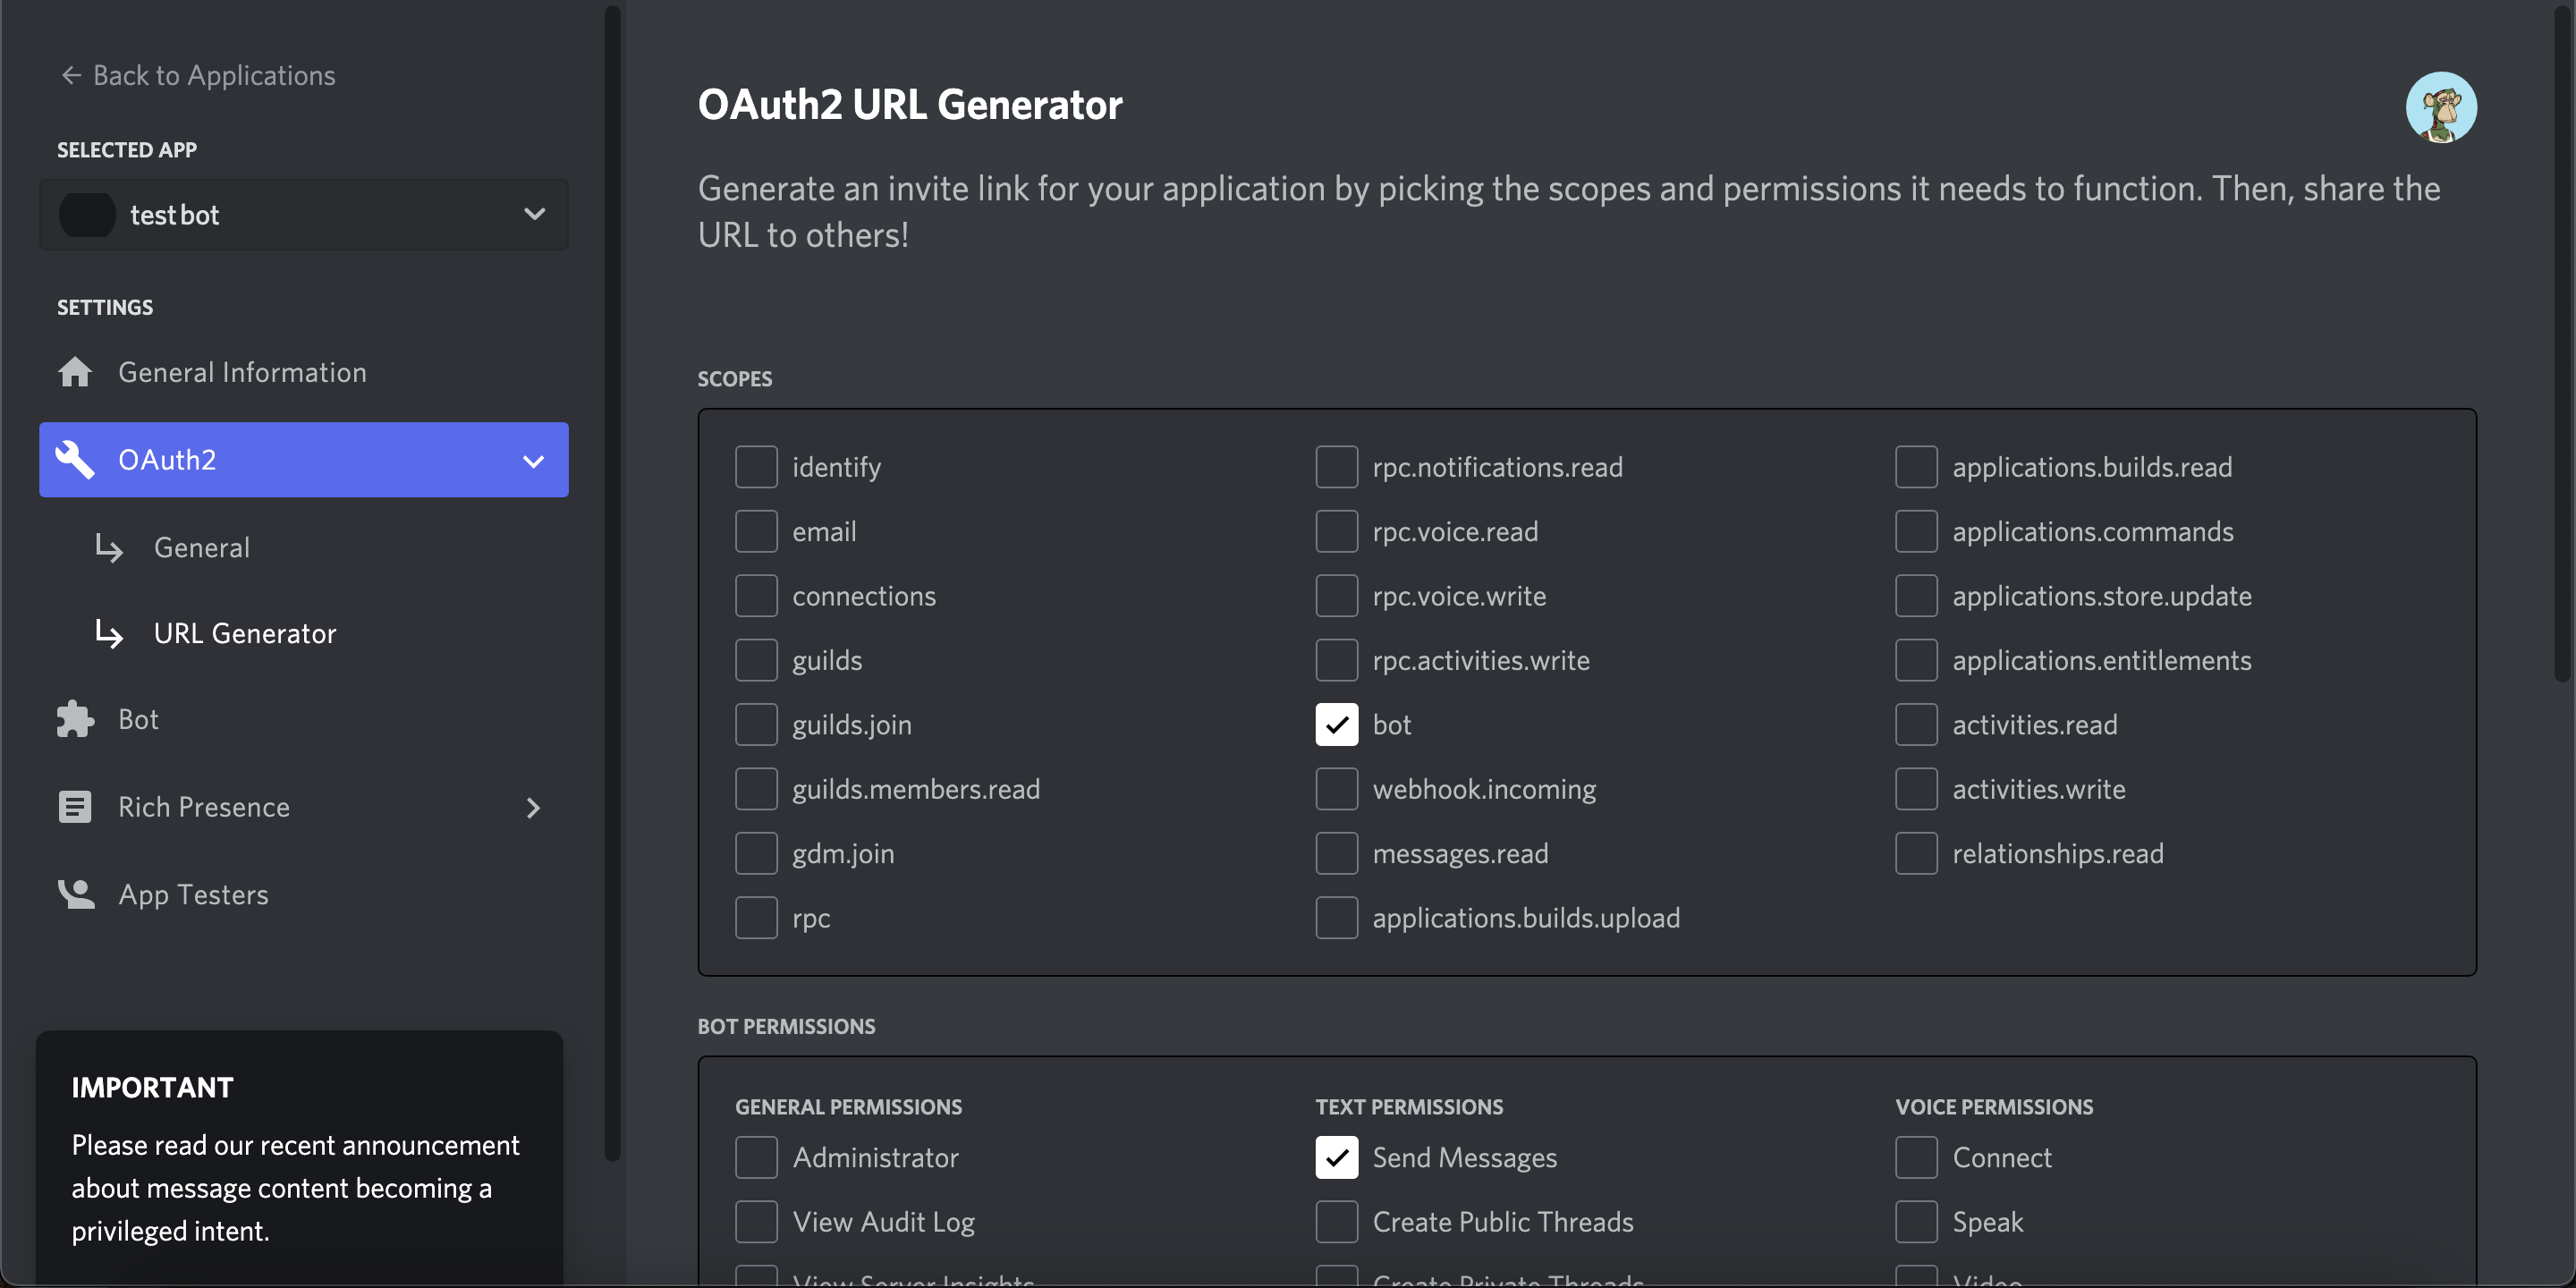

7. Now we give the bot it's permissions. We only need our bot to send messages but if you want, you can give it other permissions too depending on what you're gonna do with it.

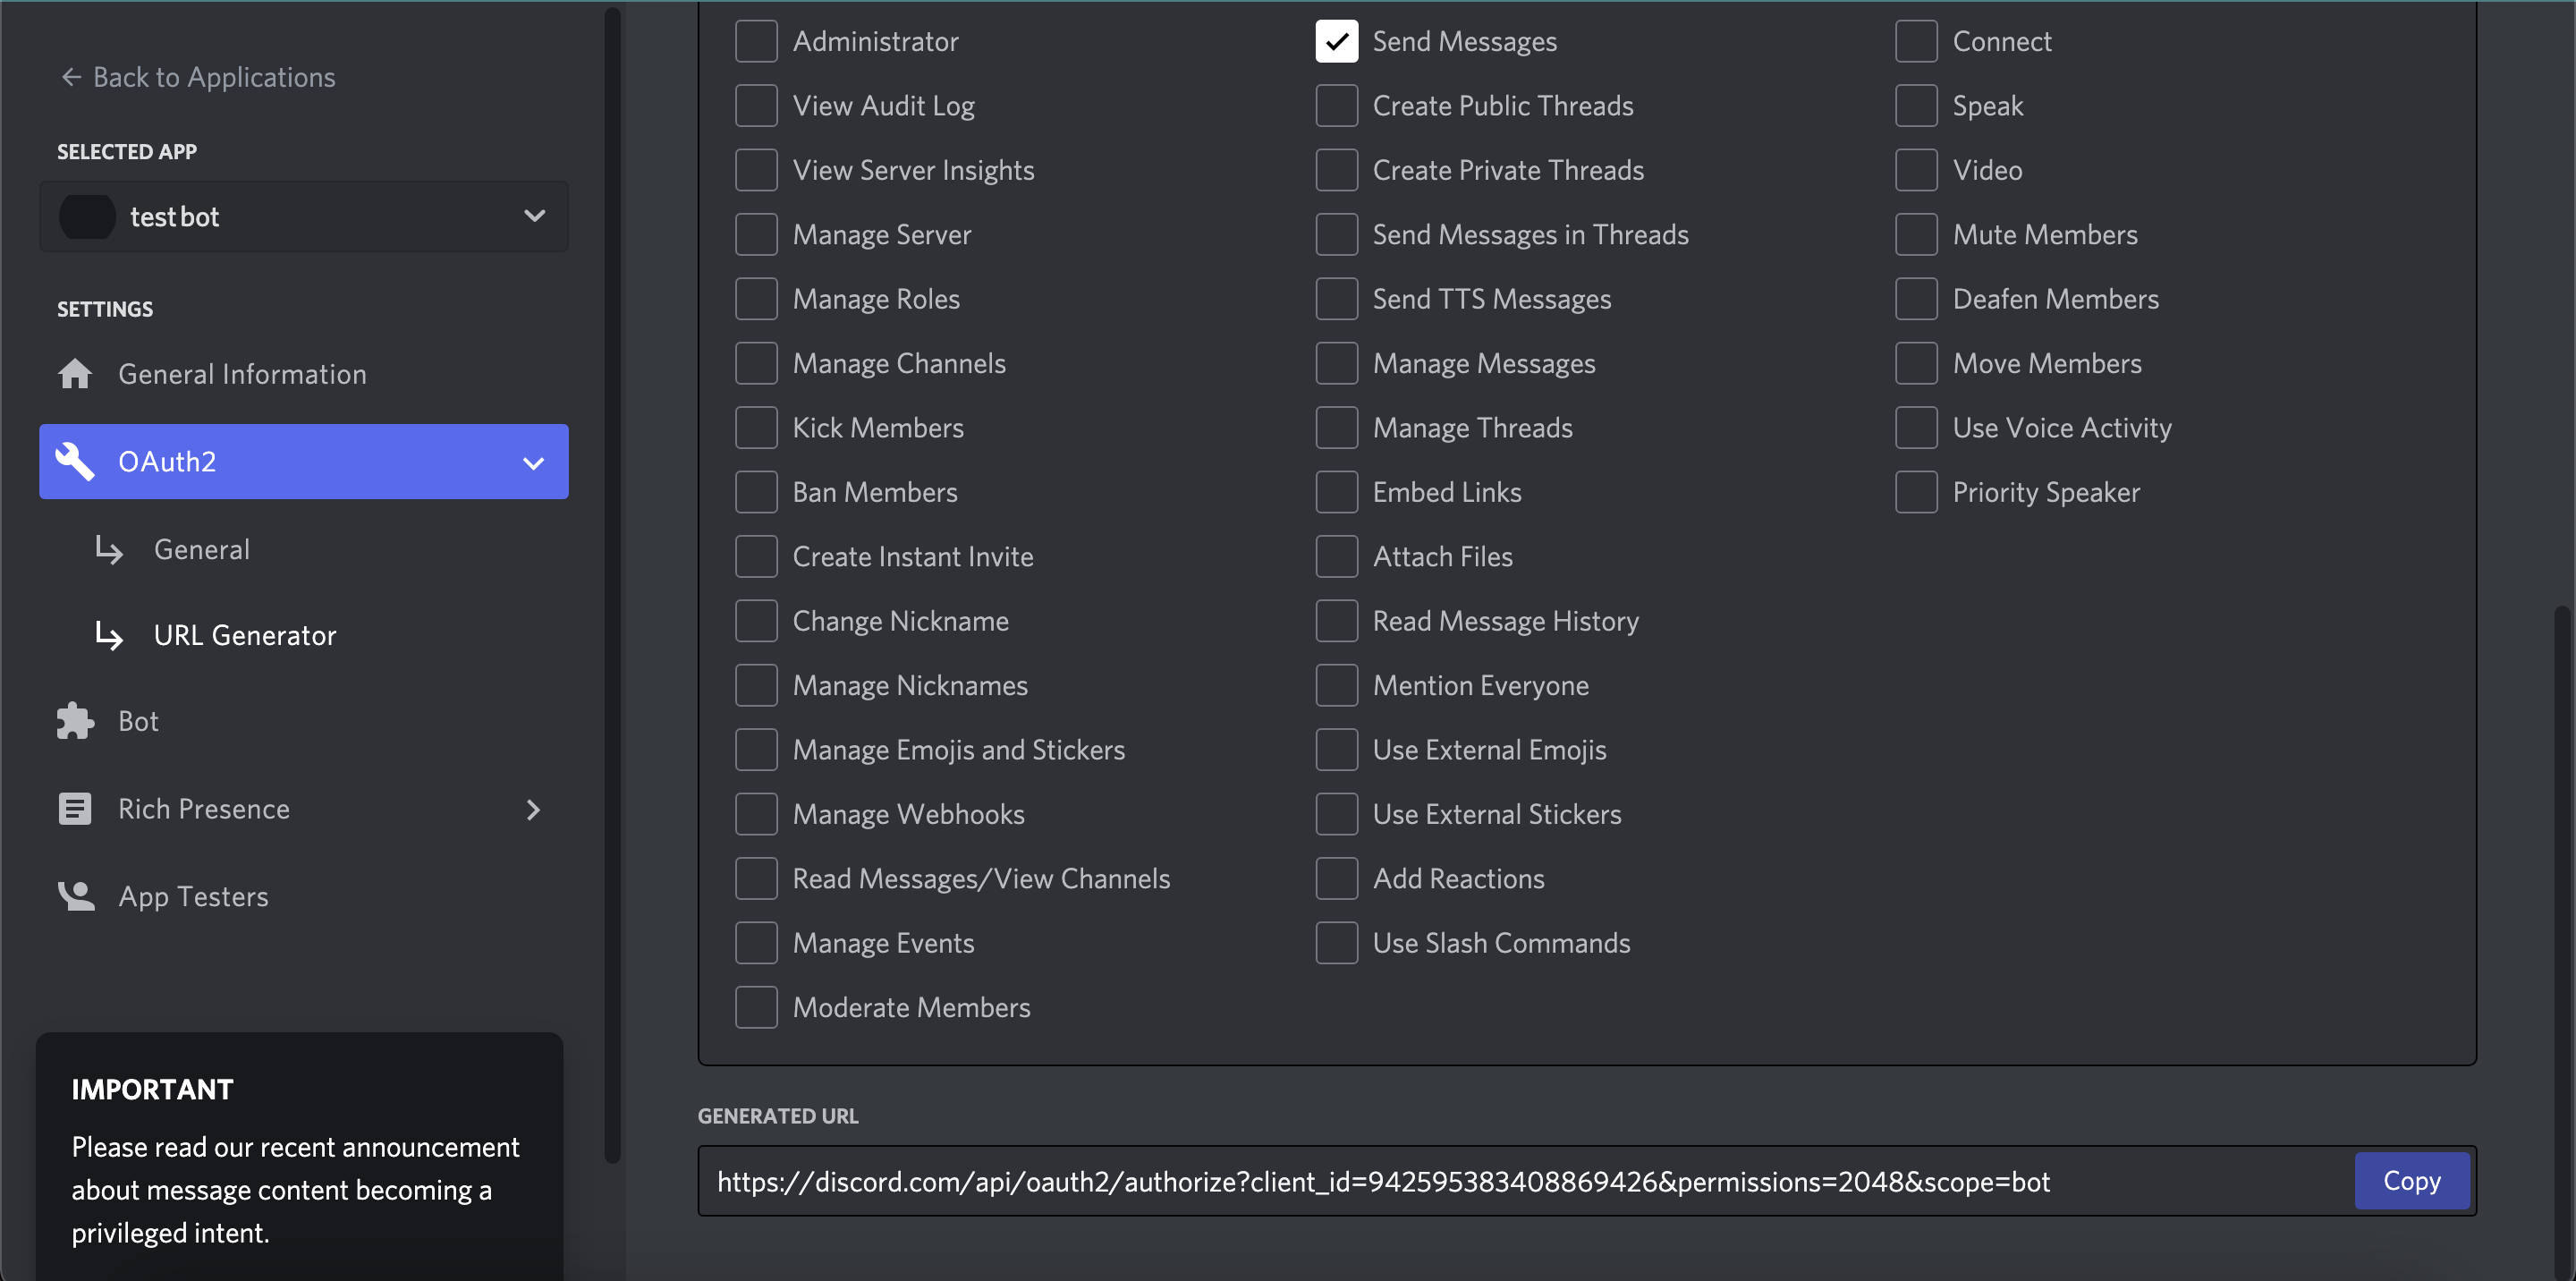

8. Once you're done, copy the link on the bottom and paste it on your desired browser. Once you do that, it's going to prompt you to invite the bot to your server. So just go ahead and invite your bot to your server.

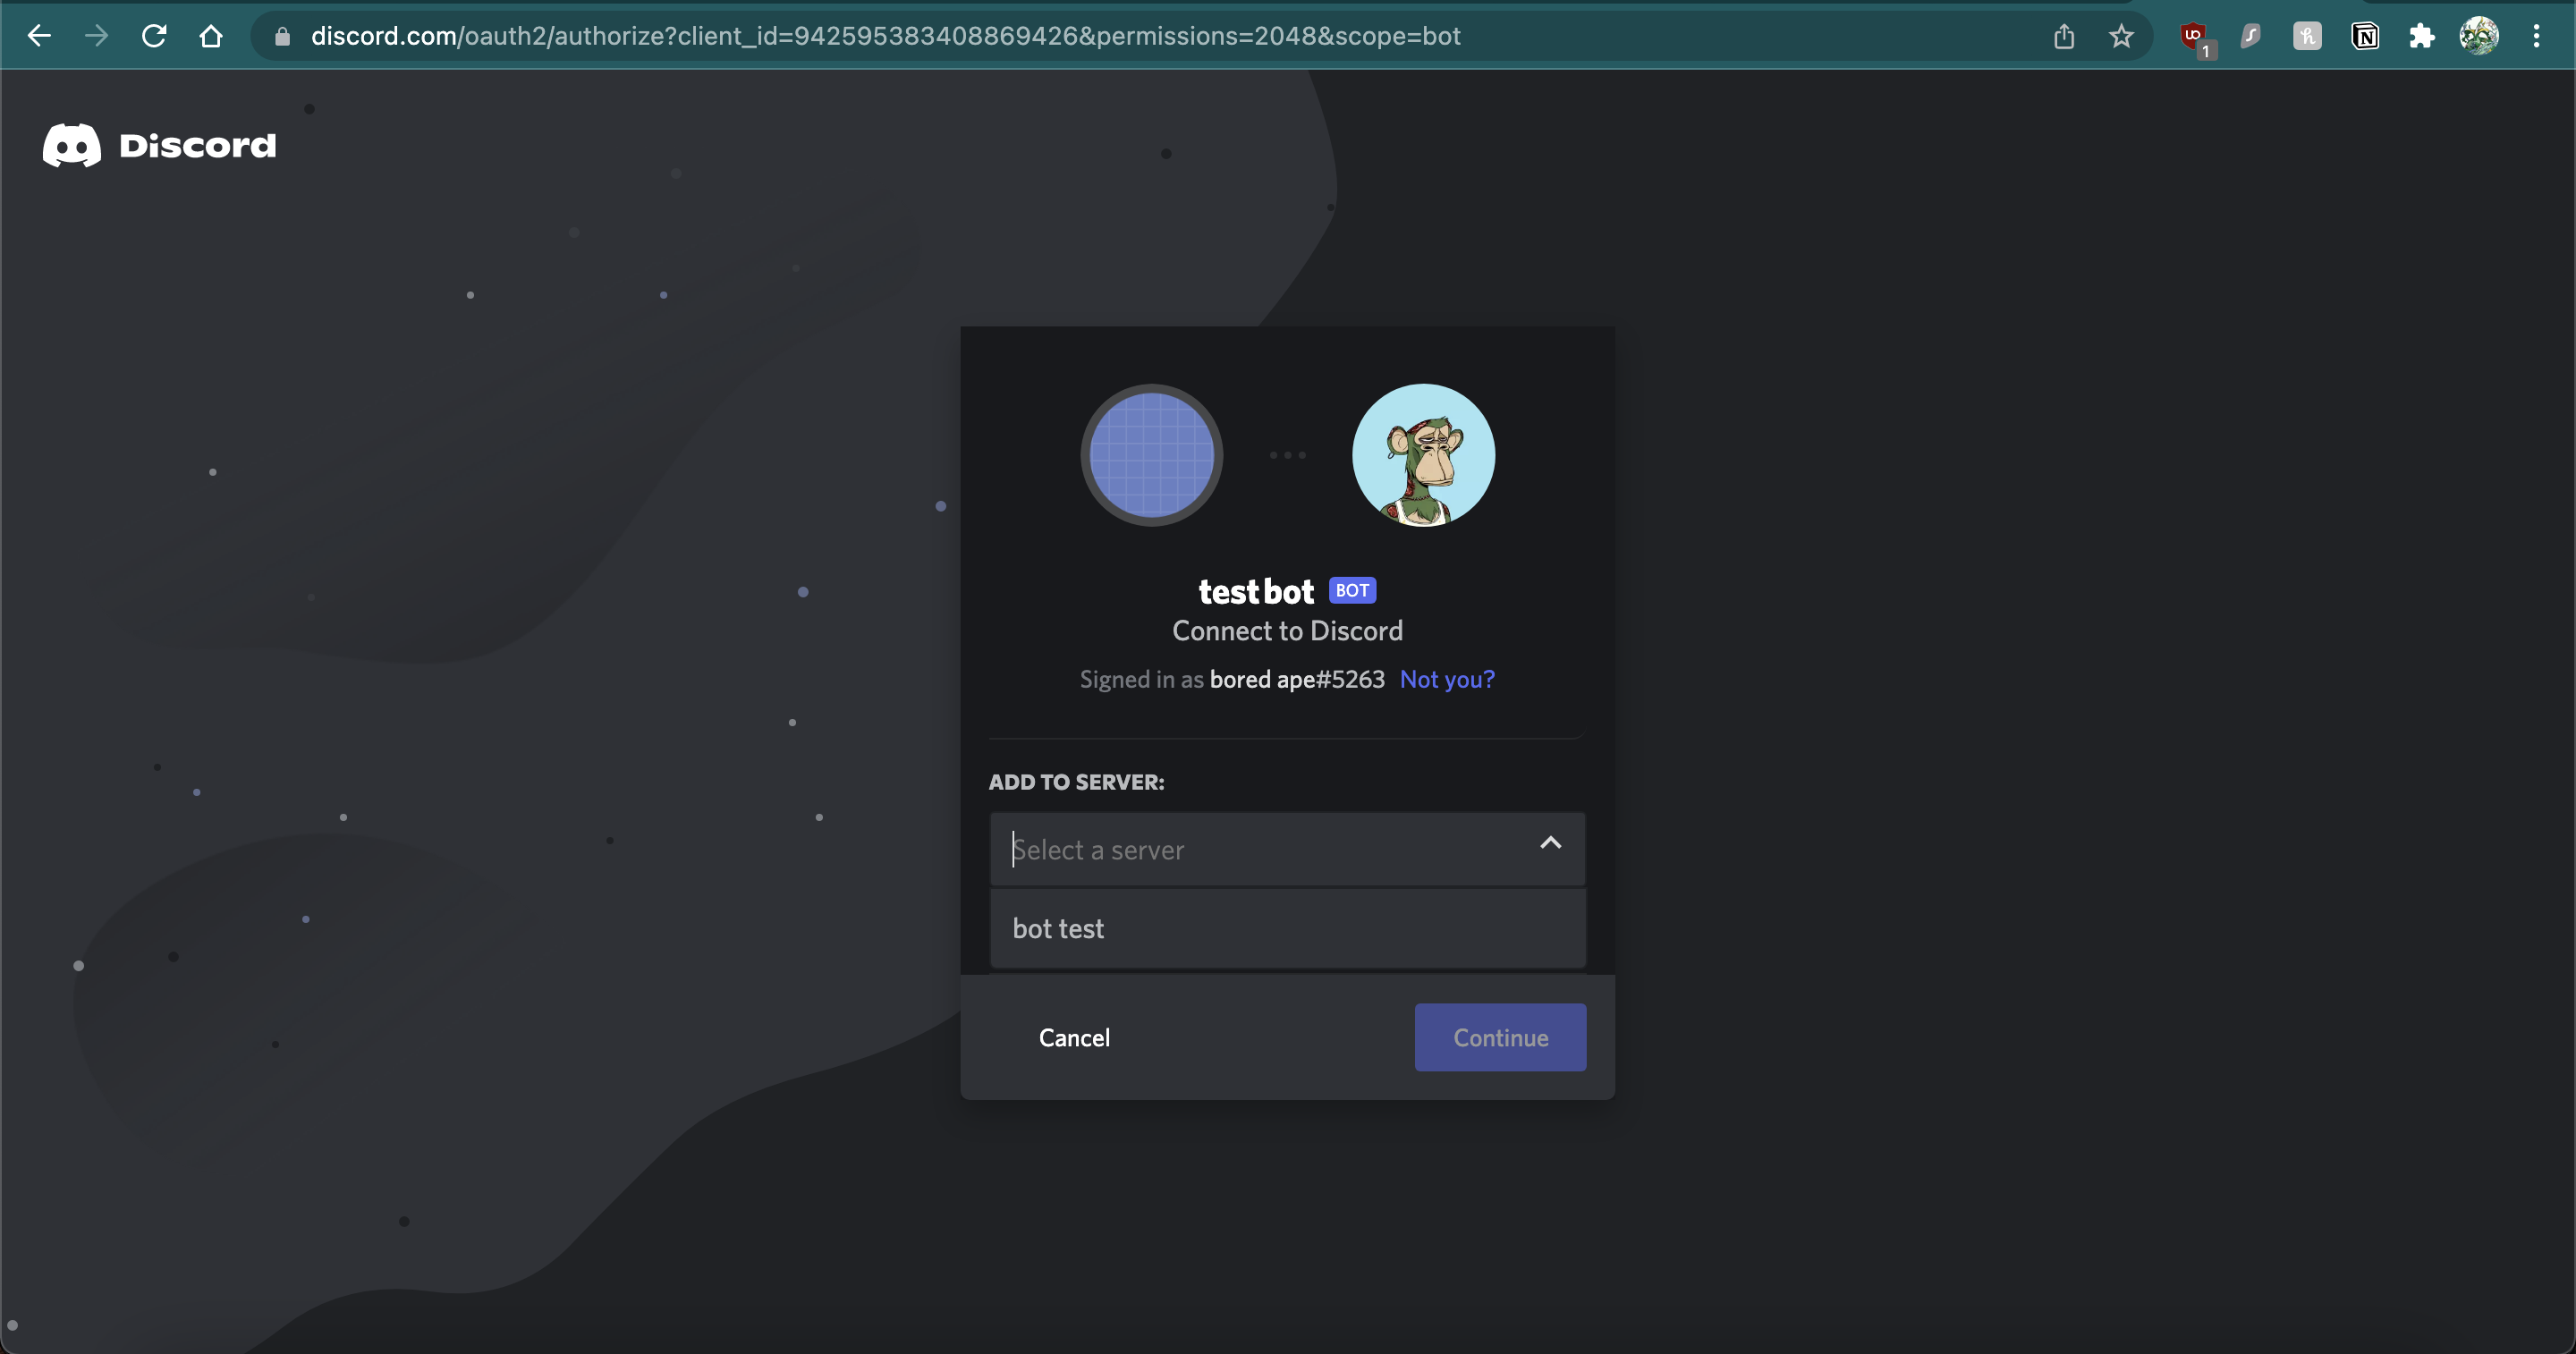

If everything is done correctly, you should see your bot appear in your server. 



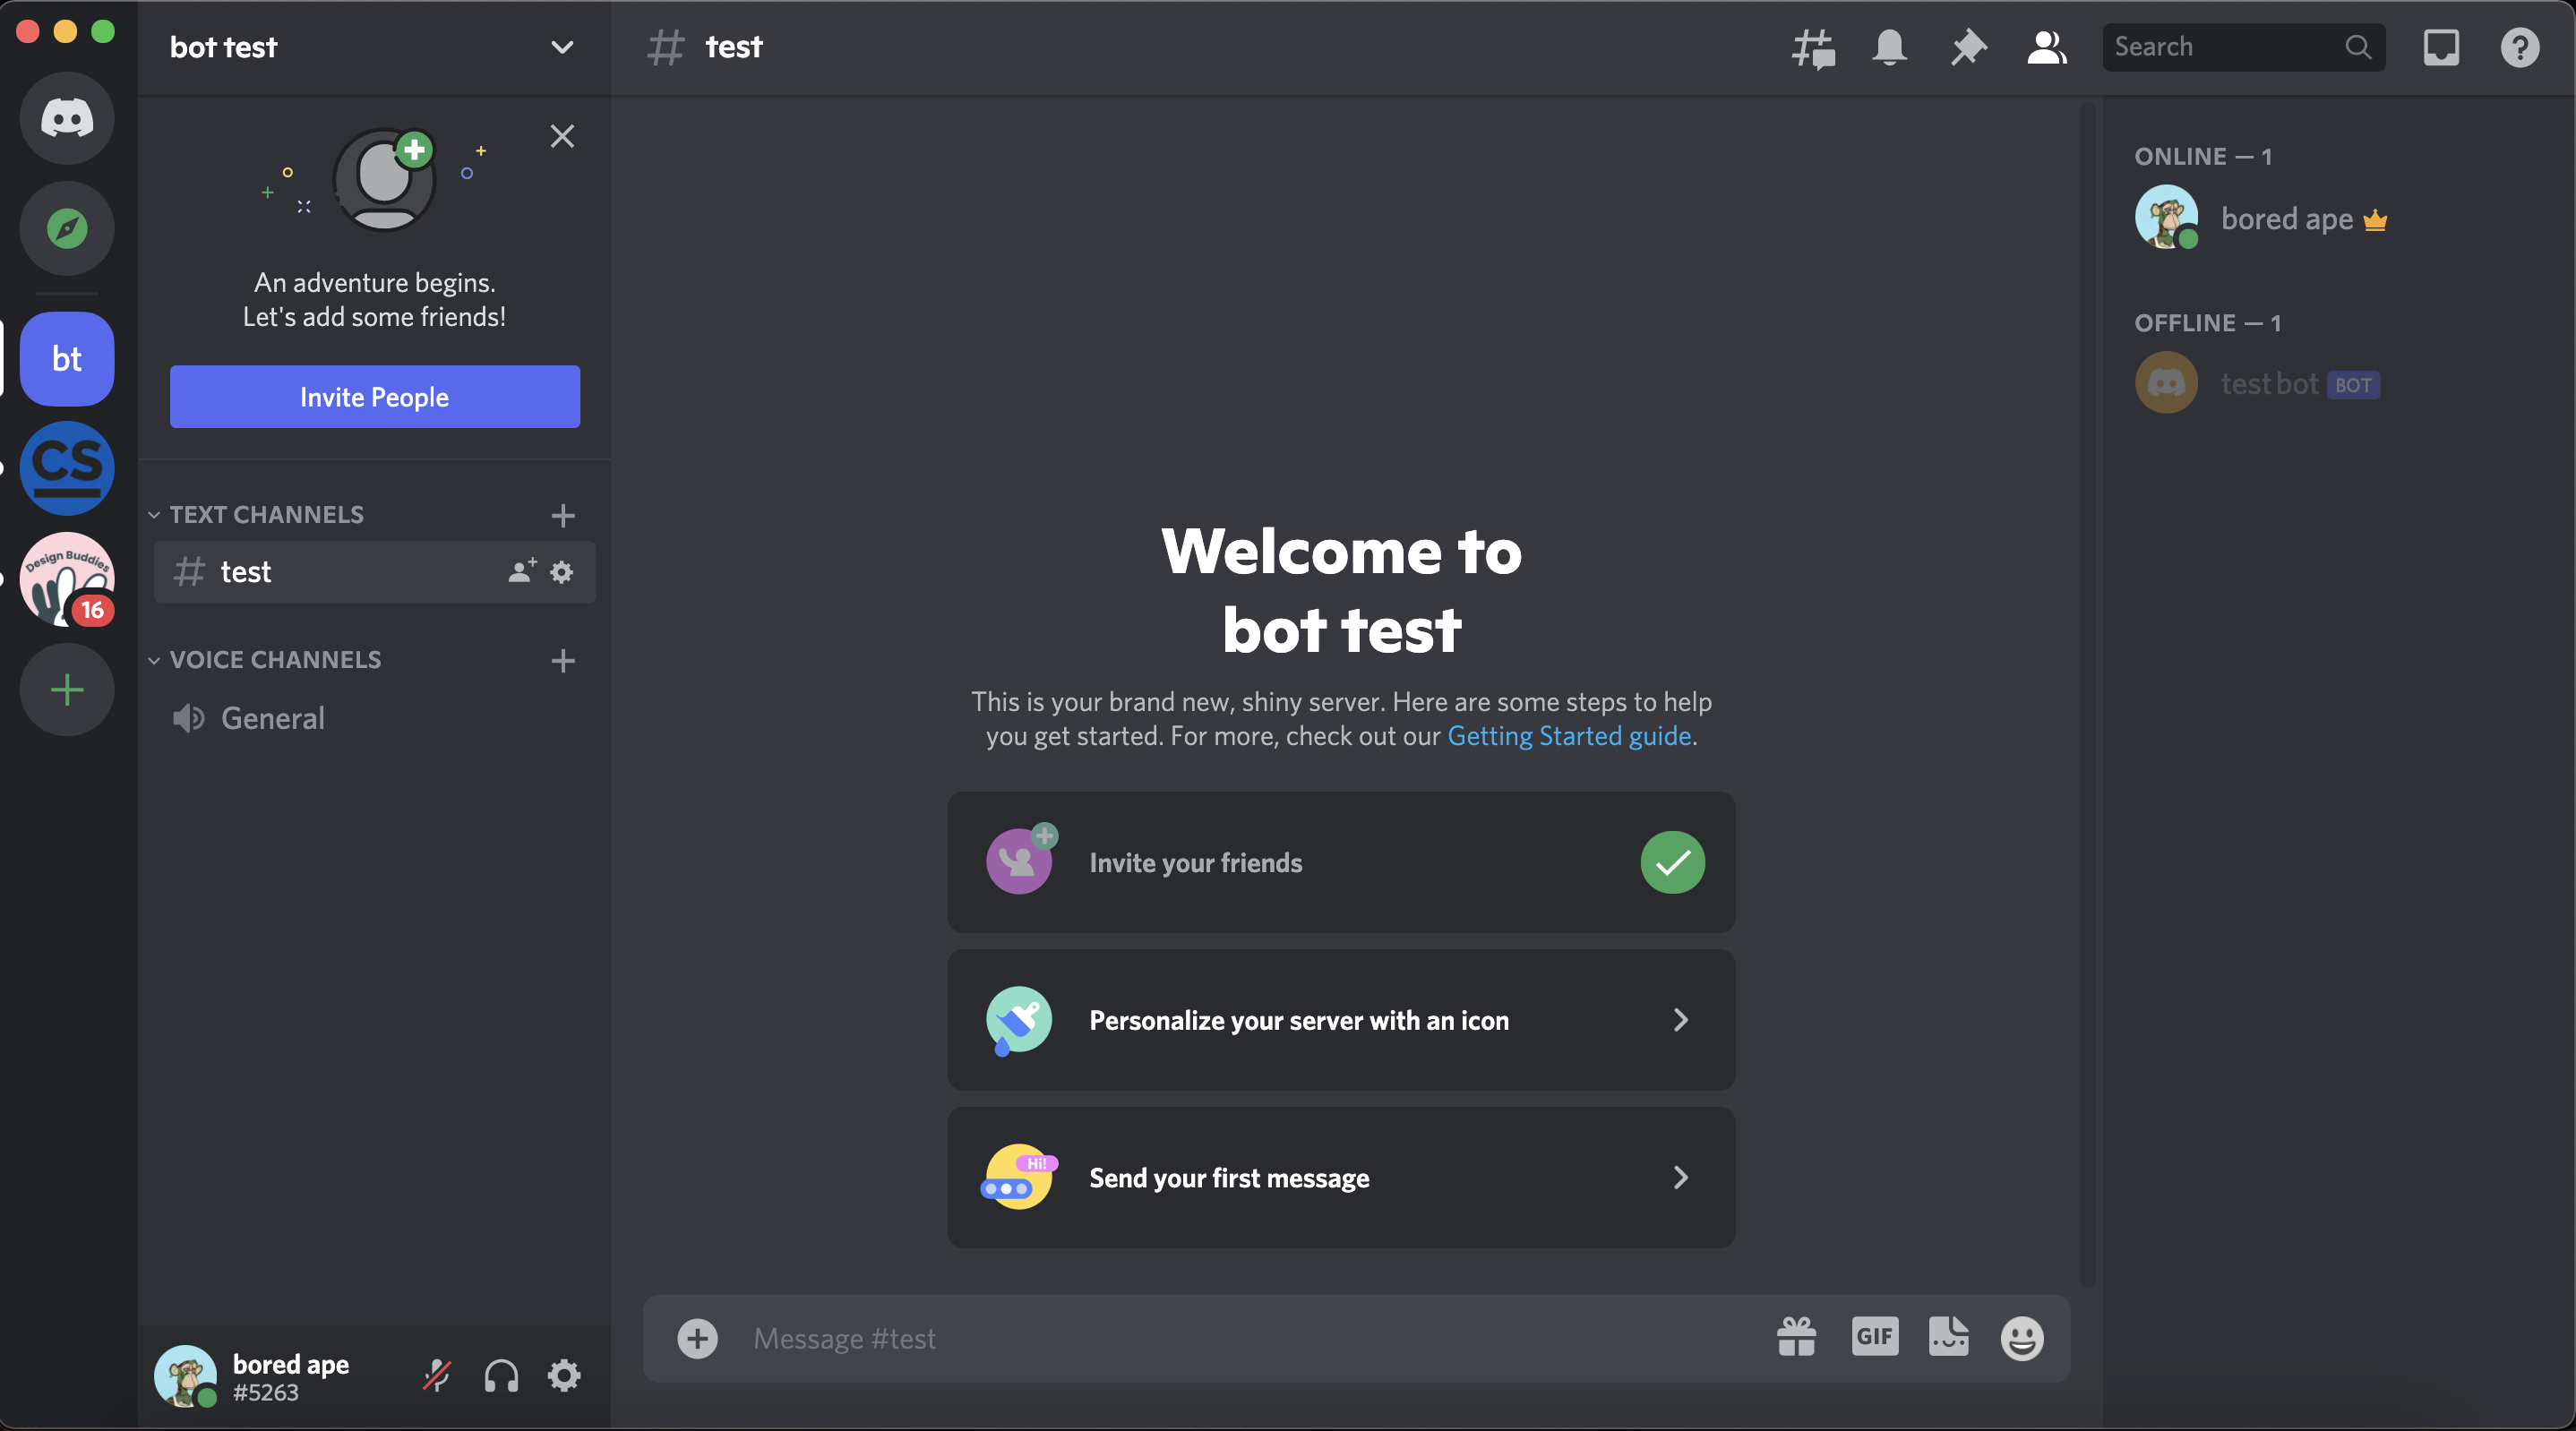


# Step 3: Programming the bot

Now lets begin actually programming the bot.


## Creating the bot
---
Follow the steps below in order to run your first bot.

1. We set up our discord client. In order to setup discord client, we must type the following line. This will allow our discord bot to send us the data we requested from the server side.
```
client = discord.Client()
```
2. Next, we will make our bot prefix. What this does is it helps us to call the bot only when we use the prefix in our message. This allows us to prevent accidental requests from the API when a user types a message in chat.
```
client = commands.Bot(command_prefix="!")
```
3. So far so good am i right? But how will we know if our bot is running? Good question... Now we're going to make an event in our code which will let us know the bot is alive on startup. We will type the following code below:
```
@client.event
async def on_ready():
  print("im alive and ready to go!")
```

4. Now we can add a command to test if our bot works. So we will now create a command where if we type hello with the prefix, our bot will respond. In order to do that, we type the following snippet of code:
```
@client.command()
async def hello(message):
  await message.channel.send("hello!")
```

5. We will now add our Discord bot token in our code, This will allow us to access our discord bot in our code. To do this we need to type
```
client.run("{your token goes here}")
```

6. Before we put our token, we must first create a .env file. What this does is make our bot token hidden so nobody else can access it. It is a part of Discord's Terms and Services to hide your discord bot token when you create it so that nobody else can access your bot and do harm. So we will create a .env file in our code editor. If you're on Repl.it like us, then go to step 7. 
Now we type the following code:
```
TOKEN = [paste token here]
```
 

Now all we need to do is run our bot for the first time. If you run your code now, you should see in your terminal that the bot is alive because of the function we created. If you look at your server you should also see your bot is online right now. Now lets test if your bot will respond to us when we type `!hello` in our message. The prefix `!` is our wake-word for our bot. 

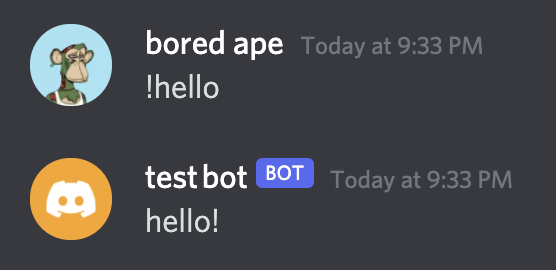

We see our bot works just fine and does respond to our commands. Congratulations you just made your first discord bot 🙂





Your code should look like this so far. You can copy this part of the code if you wish.

In [ ]:
import os
import discord
from discord.ext import commands
import requests
import json

client = discord.Client()
client = commands.Bot(command_prefix="!")


@client.event
async def on_ready():
  print("im alive and ready to go!")

@client.command()
async def hello(message):
  await message.channel.send("hello!")

client.run (os.environ['TOKEN'])


## Making the bot command

---




So we created our first discord bot. That's amazing! give yourself a pat in the back for that for making it this far! But our bot doesn't know how to do anything other than say hello back. Isn't that boring? That's why in this part, we will create commands for this bot so that it actually has a use. For that, we're going to be using an API to do all the work for us. 

We're going to be creating a Poke-Dex from Pokemon! If you don't know what a pokedex is, it's an encyclopedia for Pokemon where you can get info and other details of Pokemon from the games. We will use [Poke-Api](https://pokeapi.co/) to get the data we're looking for using our discord bot. You can click on the highlighted link to take a look at the documentation. We will use Poke-Api to make API calls and get the data of the Pokemon we want to get information about as a discord bot command.

1. We start by creating our command `@client.command()` and then on the next line, we type `async def info(ctx,message):` We have created a function with the name info and we will use this function to make requests with our Bot. 


2. Since we have imported requests, we can now make requests from our client side. Now we need to specify the place from where we will make our api calls to. For that, we will have to use a link. To do that, we will create an f-string in our function on the next line by typing `pokemon_url = f"https://pokeapi.co/api/v2/pokemon/{message}" `. What this line of code does is basically whatever pokemon we mention in our message is going to be replaced by the `{message}` part of our code and our function will go to the following link and get data of our desired Pokemon. 
> for your curiosity, if you paste the following link in your browser: [https://pokeapi.co/api/v2/pokemon/charmander](https://pokeapi.co/api/v2/pokemon/charmander), you'll be able to see all the data about Charmander in the API. 

3. We will now create a variable called data and we will make a "get request" command to access the data in our URL. For that we type `  data = requests.get(pokemon_url).json()` This is basically allowing us to access contents in the json file of the API inside our code.
```
@client.command()
async def info(ctx,message):
  pokemon_url = f"https://pokeapi.co/api/v2/pokemon/{message}" 
  data = requests.get(pokemon_url).json()
```

4. If we look at the link we clicked above, we see a whole lot of data presented infront of us in .json format. 

This is unformatted json data. You can use a website to format this data to make it look more clear or you can use a chrome extension to read all the data presented to you. Luckily since this is a workshop, we don't need all those. We just need a few things from this list. 

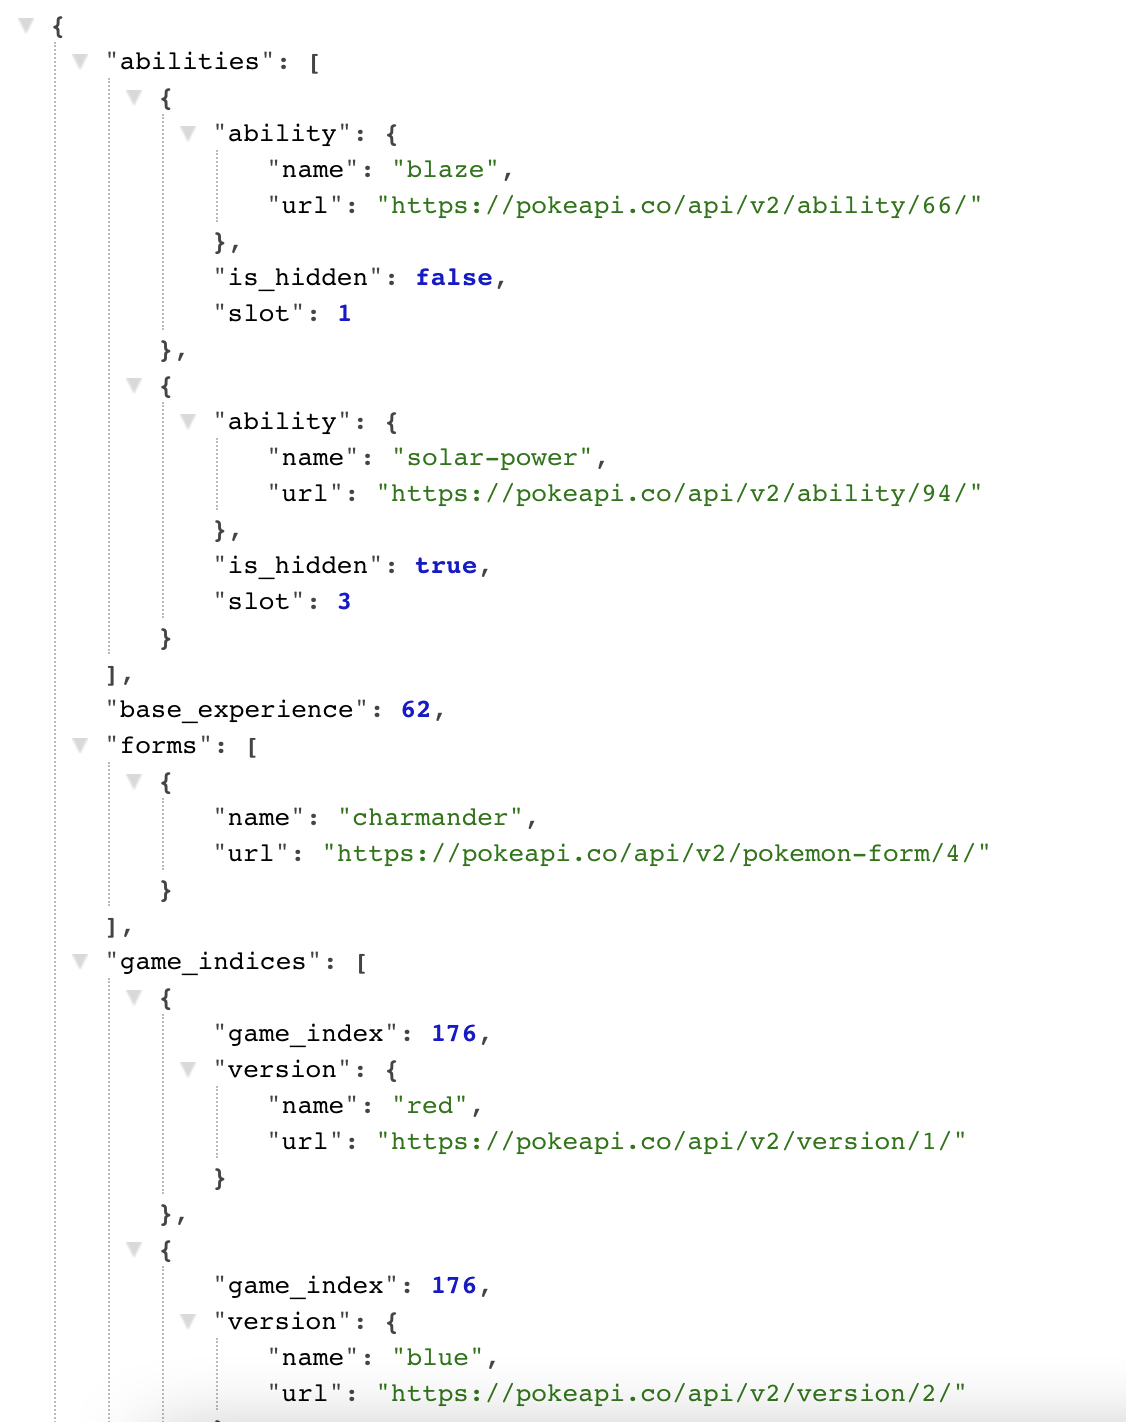

Once we format our json file, it should look like this. json means "JavaScript Object Notation" which is bacically like a list with an index and key. It's essentially arrays with a key and a index. Our goal here is to parse through this list and fetch the data we need. 

5. We need to find the Pokemon from our list. To do that, we write the followif code
```
  name = data['species']['name']
```
What this line of code is doing is it's going though each element of our list and it's fetching the data from 'name' under 'species' in the list. 

6. If you played or watched Pokemon before, every Pokemon has a type (eg. Charmander is a fire type Pokemon). This corresponds to what abilities they have. To get this info, we need to parse through the json file again to get the type our Pokemon is. We write the following line of code to get the type for our Pokemon:
```
poketype = data['types'][0]['type']['name']
```
Here, we're accessing the 'name' of the 'type' of Pokemon from index-0 of the 'types' category. 

7. We also need to show what our Pokemon looks like of course. Instead of  downloading and savinv every Pokemon image locally, our API does the job for us by just giving is the URL for the images to display. To access the images of our Pokemon, we type the following line:
```
  image = data['sprites']['front_default']
```
Here, we're getting the game sprite of our Pokemon from the API and displaying it. 

8. Now, we just need our discord bot to print the data for us by creating a message. Se type `await ctx.send()`. This allows the discord bot to send the data back to us in a message. so we type 
```
  await ctx.send(image) #for the image
  await ctx.send('Name: '+name) #for the name of our Pokemon
  await ctx.send('Type: '+poketype) #for the type of our Pokemon
``` 
Our command should look like this now. 

In [ ]:
@client.command()
async def info(ctx,message):
  pokemon_url = f"https://pokeapi.co/api/v2/pokemon/{message}" 
  data = requests.get(pokemon_url).json()
  name = data['species']['name']
  poketype = data['types'][0]['type']['name']
  image = data['sprites']['front_default']
  await ctx.send(image)
  await ctx.send('Name: '+name)
  await ctx.send('Type: '+poketype)

9. Now let's see if our command actually works or not. To try our command we made, we simply call our function with our prefix and name the Pokemon we want to find. So we type `!info {name of the Pokemon here}` to see if our command works.

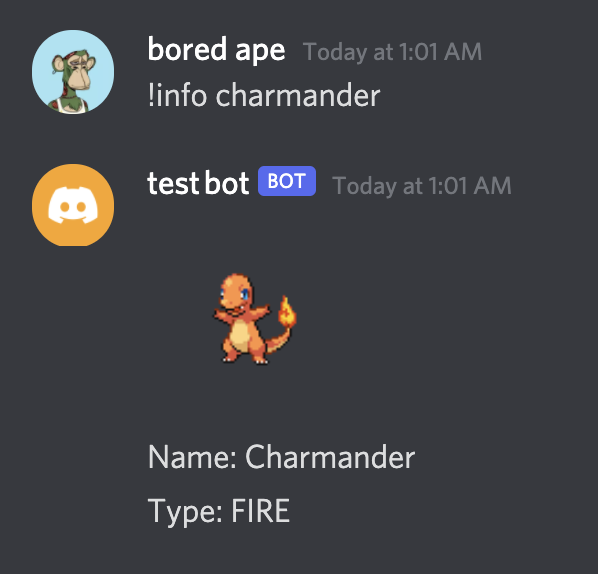

If you did everything correctly, you should see your bot responding back to you with the data we requested. 

10. Great job if you've successfully made it this far. But we're not done just yet. Our Pokedex isn't complete without the description of our Pokemon to tell us about it. To access the description of our Pokemon, we need to dig deeper into the Poke-API documentation and find the URL for our Pokemon Description json file. Luckily, we did all the digging for you and found the URL. So just like we modified the URL in the previous step to find our pokemon, we're gonna write another f-strign with our URL and we will modify it with the name of our Pokemon to get the description.
```
description = requests.get(f"https://pokeapi.co/api/v2/pokemon-species/{message}").json()
```
So whenever we call our function, our function will replace `{message}` with the name of our Pokemon and give us the json file for the description of our desired Pokemon. 


11. Finally, to access the description of our Pokemon from the json file, we type the following line:
```
entry = description['flavor_text_entries'][0]['flavor_text']
```
Here, we made a variable named entry which will carry the description of our Pokemon from our json file.

12. Now all that's left is to print our description. So we type another `await ctx.send()` with our description.
```
await ctx.send(entry)
```
Now lets try our function again to see if we can get our description of our Pokemon. 

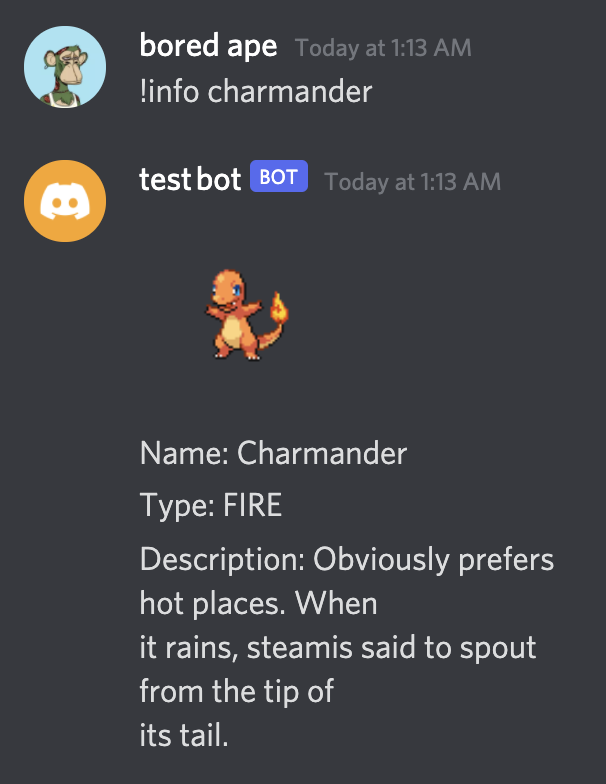

We did it! We finally have a working Poke-Dex now. 

# Creating Embeded Messages


---

We created a Poke-Dex but our message looks a bit messy. To make our result look much nicer, we're going to use embedded messages to make our code look more organized and eye-catching. Embedded messages are just messages stored inside of an object in discord using containers.

1. We will import embeds from the discord.py library. To do that, we will add this piece of code with our dependancies
```
from discord import embeds
```

Now, we can use embeds in our messages. 

2. We will delete the following lines of code from our function and get rid of all the `ctx.send()`  methods for now. 

3 We will now add the following code by creating our first embed.
```
  result = discord.Embed(title = name, description=entry)
```
This is creating an embed object with a title and description. All we do is just put the title as our 'name' variable and put the description of our embed as 'entry'.


4. We can add fields to our embedded message too. To do that, we simply type:
```  
result.add_field(name="Type: ", value = poketype, inline=False)
```
We are going to add a field with the name, 'type' and the value of our type willl be our 'poketype' variable to display the type of Pokemon. The inline command is self-explanatory. It makes the field in the same line with our description if we set it to `true` or else it will be in a different line if we set it to `false`. 
Same way, we're going to display the image of our Pokemon in our embed by typing the following code:
```
  result.set_image(url=image)

```

5. We're ready to display our message now. All we do now is add a `ctx.send` method again and test our function. Your function should now look like this.

In [ ]:
@client.command()
async def info(ctx,message):
  pokemon_url = f"https://pokeapi.co/api/v2/pokemon/{message}" 
  data = requests.get(pokemon_url).json()
  name = data['species']['name']
  poketype = data['types'][0]['type']['name']
  image = data['sprites']['front_default']

  #description
  description = requests.get(f"https://pokeapi.co/api/v2/pokemon-species/{message}").json()
  entry = description['flavor_text_entries'][0]['flavor_text']

  #returns our info in an embed
  result = discord.Embed(title = name, description=entry)
  result.add_field(name="Type: ",value = poketype,inline=False)
  result.set_image(url=image)
  await ctx.send(embed=result)

Let's run our code again and see if our command works. 

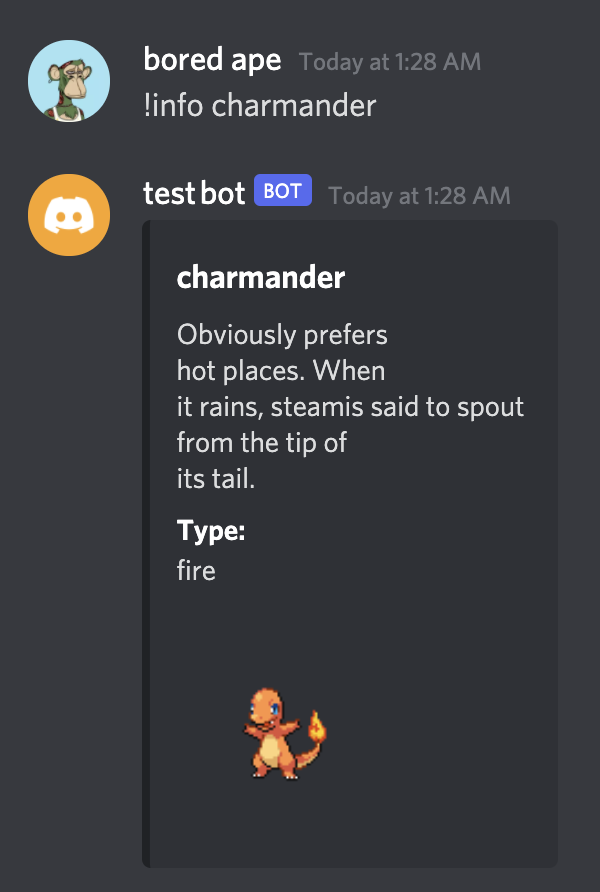

# Congratulations 
You made it to the end! Now you have a fully functional discord bot. The next step is for you to tinker around with it by watching other tutorials and resources online and go crazy with them.